In [1]:
import logging
logging.basicConfig(level=logging.INFO)
from utils_segmentation import *

plots = True

cmap = mpl.colors.ListedColormap(['y', 'r', 'g','w','b','m','c','k'])
norm = mpl.colors.BoundaryNorm([0,1,2,3,4,5,6,7,8], cmap.N)

In [2]:
noon_thresh = 20#degrees

start_dates_cook = [*pd.read_excel(os.path.join(p0,'StartStopDates.xlsx')).Start.str.strip("'").values.tolist(),
 *pd.read_excel(os.path.join(p1,'StartStopDates.xlsx')).astype({'Start':'str'}).Start.values.tolist()]
stop_dates_cook = [*pd.read_excel(os.path.join(p0,'StartStopDates.xlsx')).Stop.str.strip("'").values.tolist(),
 *pd.read_excel(os.path.join(p1,'StartStopDates.xlsx')).astype({'Stop':'str'}).Stop.values.tolist()]

In [14]:
start_dates_cprl = pd.read_excel(os.path.join(p00,'StartStopDates.xlsx')).Start.str.strip("'").values.tolist()
stop_dates_cprl = pd.read_excel(os.path.join(p00,'StartStopDates.xlsx')).Stop.str.strip("'").values.tolist()

In [15]:
start_dates_cook = [pytz.utc.localize(datetime.strptime(d, '%Y%m%d%H%M%S')) for d in start_dates_cook]
stop_dates_cook = [pytz.utc.localize(datetime.strptime(d, '%Y%m%d%H%M%S')) for d in stop_dates_cook]

start_dates_cprl = [pytz.utc.localize(datetime.strptime(d, '%Y%m%d%H%M%S')) for d in start_dates_cprl]
stop_dates_cprl = [pytz.utc.localize(datetime.strptime(d, '%Y%m%d%H%M%S')) for d in stop_dates_cprl]

In [16]:
model_mlp_v1 = pickle.load(open(os.path.join(p3,'model_pipeline_V1_mlp_batch_final.pk.sav'), 'rb'))
model_mlp_v2 = pickle.load(open(os.path.join(p3,'model_pipeline_V2_mlp_batch_final.pk.sav'), 'rb'))
model_mlp_v3 = pickle.load(open(os.path.join(p3,'model_pipeline_V3_mlp_batch_2024_final.pk.sav'), 'rb'))

cal_nsar_v0 = pickle.load(open(os.path.join(p3,'calibration_nsar1.pk.sav'), 'rb'))#20220705
cal_nsar_v1 = pickle.load(open(os.path.join(p3,'calibration_nsar2.pk.sav'), 'rb'))#20221122
cal_nsar_v2 = pickle.load(open(os.path.join(p3,'calibration_nsar3.pk.sav'), 'rb'))#20230315
[model0,model1,model2,I0,I1] = pickle.load(open(os.path.join(p3,'calibration_nsar_pwlf.pk.sav'), 'rb'))#V3
[model0_v3,model1_v3,model2_v3,I0_v3,I1_v3] = pickle.load(open(os.path.join(p3,'calibration_nsar_pwlf_v3.pk.sav'), 'rb'))#V3
cal_nsar_v3 = pickle.load(open(os.path.join(p3,'calibration_nsar_lf_v3.pk.sav'), 'rb'))#V3

cal_cprl = pickle.load(open(os.path.join(p3,'calibration_cprl1.pk.sav'), 'rb'))#20230305

In [17]:
print('%3.4fx%3.4f'%(cal_cprl.coef_[0][0],cal_cprl.intercept_))
print('%3.4fx%3.4f'%(cal_nsar_v2.coef_[0][0],cal_nsar_v2.intercept_))
print('%3.4fx%3.4f'%(cal_nsar_v3.coef_[0][0],cal_nsar_v3.intercept_))
print('%3.4fx+%3.4f x<%3.4f'%(model0.coef_[0][0],model0.intercept_,I0))
print('%3.5fx+%3.4f %3.5f<=x<%3.4f'%(model1.coef_[0][0],model1.intercept_,I0,I1))
print('%3.4fx+%3.4f x>=%3.4f'%(model2.coef_[0][0],model2.intercept_,I1))

0.0251x-451.0125
0.0282x-536.3049
0.0117x-49.4184
0.0097x+7.8290 x<29655.1850
0.03140x+-636.3688 29655.18500<=x<29811.2450
0.0093x+22.4168 x>=29811.2450


../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_222143_bgr.png 0
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_222144_ir.png 0
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_222646_bgr.png 1
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_222646_ir.png 1
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_223146_bgr.png 2
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_223147_ir.png 2
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_223647_bgr.png 3
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_223647_ir.png 3
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_224147_bgr.png 4
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_224148_ir.png 4
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_232029_bgr.png 5
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_232029_ir.png 5
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_232530_bgr.png 6
../../raw/CookIRCamET/Images/CookHY2024/V3/20230814_232530_ir.png 6
../../raw/CookIRCamET/Images/CookHY2024/V

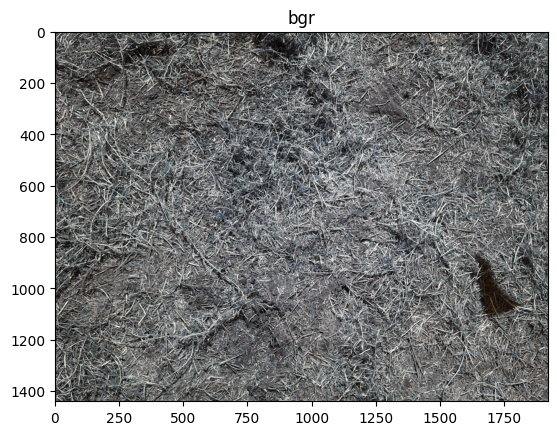

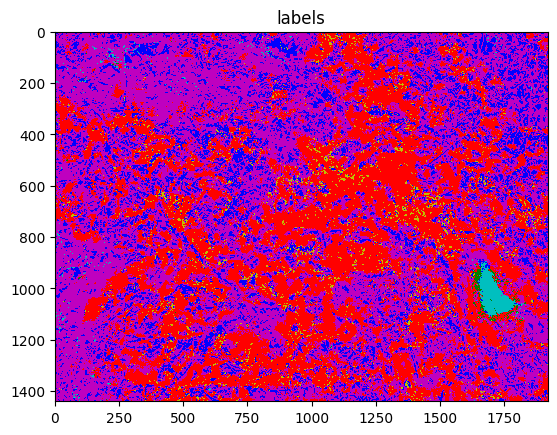

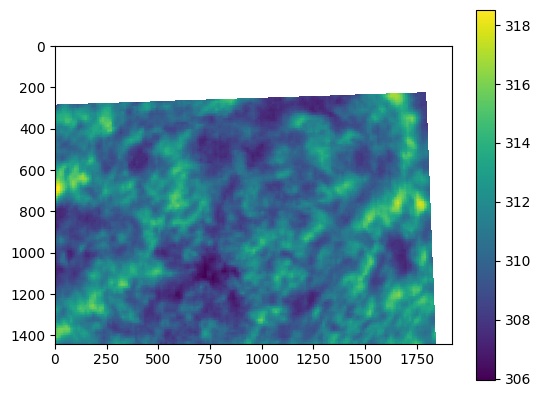

../../raw/CookIRCamET/Images/CookHY2024/V3/20230908_211912_bgr.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230908_211912_ir.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230908_221912_bgr.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230908_221913_ir.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230908_231913_bgr.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230908_231913_ir.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230909_001914_bgr.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230909_001914_ir.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230909_011914_bgr.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230909_011915_ir.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230909_021915_bgr.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230909_021915_ir.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230909_031915_bgr.png 10
../../raw/CookIRCamET/Images/CookHY2024/V3/20230909_031916_ir.png 10
../../raw/CookIRCamET/Image

KeyboardInterrupt: 

In [18]:

# In[ ]:


# for di, versions, models, start_dates, stop_dates in zip([p0,p1,p00],
#                                                          [['V1','V2'],['V3'],['V1','V2']],
#                                                          [[model_mlp_v1,model_mlp_v2],[model_mlp_v3],[model_mlp_v1,model_mlp_v2]],
#                                                          [start_dates_cook,start_dates_cook,start_dates_cprl],
#                                                          [stop_dates_cook, stop_dates_cook, stop_dates_cprl]):
# for di, versions, models, start_dates, stop_dates in zip([p00],
#                                                         [['V2']],
#                                                         [[model_mlp_v2]],
#                                                         [start_dates_cprl],
#                                                         [stop_dates_cprl]):
for di, versions, models, start_dates, stop_dates in zip([p1],
                                                         [['V3']],
                                                          [[model_mlp_v3]],
                                                          [start_dates_cook],
                                                          [stop_dates_cook]):
# for di, versions, models, start_dates, stop_dates in zip([p0],
#                                                          [['V1']],
#                                                          [[model_mlp_v1]],
#                                                          [start_dates_cook],
#                                                          [stop_dates_cook]):

    pred_mlp=None
    pred_mlp_noon=None

    lat = np.nan
    lon = np.nan
    ti = 0
    ti_change = True
    imgs=[]
    f_sol_sun = []
    f_sol_shd = []
    f_res_sun = []
    f_res_shd = []
    f_veg_sun = []
    f_veg_shd = []
    f_snw_sun = []
    f_snw_shd = []

    T_sol_sun = []
    T_sol_shd = []
    T_res_sun = []
    T_res_shd = []
    T_veg_sun = []
    T_veg_shd = []
    T_snw_sun = []
    T_snw_shd = []

    elevation = []
    azimuth = []

    times = []
    
    daylight = []

    noon_delta_new = 100
    noon_delta_old = 100
    n_img=0
 
    if di==p00:
        aff_df = pd.read_csv(os.path.join(p00,'AffineCoords20230623.csv'))
        dstXY=aff_df[['RGBx','RGBy']].values
        srcXY=aff_df[['IRx','IRy']].values
        warp_mat = cv2.estimateAffine2D(srcXY,dstXY)
    elif di==p0:
        warp_mat = (np.array([[  7.88031998,   0.28718853,  -6.50989774],
                              [  0.03765769,   7.90500728, -28.32654208]]),
                    np.array([[1],
                              [1],
                              [1],
                              [0]], dtype=np.uint8))
    elif di==p1:
        aff_df = pd.read_csv(os.path.join(p1,'AffineCoords20230908_full.csv'))
        dstXY=aff_df[['RGBx','RGBy']].values
        srcXY=aff_df[['IRx','IRy']].values
        warp_mat = cv2.estimateAffine2D(srcXY,dstXY)
        
    for version, model in zip(versions,models):
        f_imgs_ir = list()
        f_imgs_bgr = list()
        utc_ir = list()
        utc_bgr = list()
        for f in os.listdir(os.path.join(di,version)):
            if '.png' in f:
                time_place = f.split('.png')[0].split('_')
                if version=='V1': 
                    t_meas = pytz.utc.localize(datetime.strptime(time_place[0],'%Y%m%d%H%M%S'))
                elif version=='V2' or version=='V3':
                    if di==p0 or di==p1:
                        t_meas = pytz.utc.localize(datetime.strptime(time_place[0]+time_place[1],'%Y%m%d%H%M%S'))
                    elif di==p00:
                        t_meas = pytz.utc.localize(datetime.strptime(time_place[0],'%Y%m%d%H%M%S'))
                if '_bgr' in f:
                    f_imgs_bgr.append(f)
                    utc_bgr.append(t_meas)
                if '_ir' in f:
                    f_imgs_ir.append(f)
                    utc_ir.append(t_meas)

        ibgr = np.argsort(utc_bgr)
        iir = np.argsort(utc_ir)
        utc_bgr = np.array(utc_bgr)[ibgr]
        utc_ir = np.array(utc_ir)[iir]
        f_imgs_bgr = np.array(f_imgs_bgr)[ibgr]
        f_imgs_ir = np.array(f_imgs_ir)[iir]

        #find closest IR match to BGR
        idx = []
        for utc, f in zip(utc_bgr,f_imgs_bgr):
            idx.append(np.argmin(np.abs(utc_ir-utc)))

        utc_ir = np.array(utc_ir)[idx]
        f_imgs_ir = np.array(f_imgs_ir)[idx]
        for f_bgr, f_ir in zip(f_imgs_bgr,f_imgs_ir):
            print(os.path.join(di,version,f_bgr),ti)
            print(os.path.join(di,version,f_ir),ti)
            bgr = cv2.imread(os.path.join(di,version,f_bgr),cv2.IMREAD_UNCHANGED)
            #filter nighttime
            #20221017084722_-117.081903_46.781495_bgr.png
            time_place = f_bgr.split('_bgr.')[0].split('_')
            if version=='V1':
                utc = pytz.utc.localize(datetime.strptime(time_place[0], '%Y%m%d%H%M%S'))
            elif version=='V2' or version=='V3':
                if di==p0 or di==p1:
                    utc = pytz.utc.localize(datetime.strptime(time_place[0]+time_place[1],'%Y%m%d%H%M%S'))
                elif di==p00:
                    utc = pytz.utc.localize(datetime.strptime(time_place[0], '%Y%m%d%H%M%S'))
            if utc>=start_dates[ti] and utc<=stop_dates[ti]: 
                theta = np.nan
                phi = np.nan
                if version == 'V1':
                    if 'nofix' not in time_place:
                        lat = np.double(time_place[2])
                        lon = np.double(time_place[1])
                    elif 'nofix' in time_place and di==p00:
                        #Latitude: 35 ° 11’ 17.45”; Longitude: 102° 5’ 43.98”; elevation : 1168 m
                        lat = 35+11/60+17.45/3600
                        lon = -(102+5/60+43.98/3600)
                    else:
                        pass
                elif version == 'V2' or version == 'V3':
                    if di == p0 or di == p1:
                        lat = 46.781553
                        lon = -117.081863
                    elif di == p00:
                        lat = 35+11/60+17.45/3600
                        lon = -(102+5/60+43.98/3600)
                    else:
                        pass
                else:
                    pass
                theta = solar.get_altitude(lat,lon,utc)
                phi = solar.get_azimuth(lat,lon,utc)
                day = False
                try:
                    _,_,v = cv2.split(cv2.cvtColor(bgr,cv2.COLOR_BGR2HSV))
                    if theta>10.0:
                        day = True
                        feat = get_features(bgr)
    
                        if not np.any(np.isnan(feat)):
                            pred_mlp = model.predict(feat).reshape(bgr.shape[0:2]).astype(np.float)
                            if plots and n_img%250==0:
                                plt.imshow(bgr)
                                plt.title('bgr')
                                plt.savefig(os.path.join(p3,di.split('/')[-1].lower()+version+'_'+datetime.strftime(utc,'%Y%m%d%H%M%S')
    +'_bgr.png'),dpi=300)
                                plt.show()
    
                                plt.imshow(pred_mlp, cmap=cmap, norm=norm, interpolation='none')
                                plt.title('labels')
                                plt.savefig(os.path.join(p3,di.split('/')[-1].lower()+version+'_'+datetime.strftime(utc,'%Y%m%d%H%M%S')
    +'_lab.png'),dpi=300)
                                plt.show()
                        
                        ir_good = False 
                        if os.path.getsize(os.path.join(di,version,f_ir))>10000:
                            ir_raw = cv2.imread(os.path.join(di,version,f_ir),cv2.IMREAD_UNCHANGED)
                            
                            if np.std(ir_raw)<1000:
                                ir_good = True
                            else:
                                ir_good = False
                        if ir_good:
                            if di==p0:
                                if utc<start_dates[6] and ti_change:#calculate affine - camera shift - get mask
                                    try:
                                        warp_mat,_ = register_ir(ir_raw,v.reshape(bgr.shape[0:2]),bgr,warp_mat=None)
                                    except:
                                        pass
                                    
                                    mask = (pred_mlp==3) | (pred_mlp==7)
                            elif di==p00:
                                if utc<=start_dates[3] and utc>=stop_dates[2]:
                                    print(utc)
                                    #calculate affine - camera shift - get mask
                                    #warp_mat,_ = register_ir(ir_raw,v.reshape(bgr.shape[0:2]),bgr,warp_mat=None)
                                    mask = (pred_mlp==3) | (pred_mlp==7)
                            _,ir = register_ir(ir_raw,v.reshape(bgr.shape[0:2]),bgr,warp_mat=warp_mat)
                            T_ir = ir.astype(np.float)
                            
                            
                            if version=='V3':
                                T_ir_ = T_ir.reshape(-1)
                                tmp = cal_nsar_v3.predict(T_ir_.reshape(-1,1))
                                T_ir_ = tmp.reshape(-1)
                                T_ir = T_ir_.reshape(T_ir.shape)
                                T_ir[T_ir==cal_nsar_v3.intercept_] = np.nan
                            else:
                                T_ir = np.piecewise(T_ir, [T_ir < I0, (T_ir>=I0) & (T_ir<I1), T_ir>=I1], [lambda x: model0.intercept_[0]+model0.coef_[0][0]*x, lambda x: model1.intercept_[0]+model1.coef_[0][0]*x, lambda x: model2.intercept_[0]+model2.coef_[0][0]*x])
                                T_ir[T_ir==model0.intercept_] = np.nan
                            if di==p0 or di==p1:
                                if utc<start_dates[6]:
                                    T_ir[mask] = np.nan
                                    pred_mlp[mask] = np.nan
                            elif di==p00:
                            #     T_ir = T_ir*cal_cprl.coef_+cal_cprl.intercept_
                            
                                if utc<=start_dates[3] and utc>=stop_dates[2]:
                                    T_ir[mask] = np.nan
                                    pred_mlp[mask] = np.nan      
                                    
                            
                            T_ir = T_ir*(1/.98)**(1/4)
                            if plots and n_img%250==0:
                                plt.imshow(T_ir)
                                plt.colorbar()
                                plt.savefig(os.path.join(p3,di.split('/')[-1].lower()+version+'_'+datetime.strftime(utc,'%Y%m%d%H%M%S')
    +'_tir.png'),dpi=300)
                                plt.show()
                        else:
                            T_ir = np.nan*v.reshape(bgr.shape[0:2])
    
                        noon_delta_new = np.abs(theta-90) 
                        if noon_delta_new<noon_delta_old:#near noon
                            pred_mlp_noon=pred_mlp.copy()
                        noon_delta_old = noon_delta_new
    
                        f_sol_sun.append(np.nansum(pred_mlp==0)/pred_mlp.shape[0]/pred_mlp.shape[1])
                        f_sol_shd.append(np.nansum(pred_mlp==4)/pred_mlp.shape[0]/pred_mlp.shape[1])
                        f_res_sun.append(np.nansum(pred_mlp==1)/pred_mlp.shape[0]/pred_mlp.shape[1])
                        f_res_shd.append(np.nansum(pred_mlp==5)/pred_mlp.shape[0]/pred_mlp.shape[1])
                        f_veg_sun.append(np.nansum(pred_mlp==2)/pred_mlp.shape[0]/pred_mlp.shape[1])
                        f_veg_shd.append(np.nansum(pred_mlp==6)/pred_mlp.shape[0]/pred_mlp.shape[1])
                        f_snw_sun.append(np.nansum(pred_mlp==3)/pred_mlp.shape[0]/pred_mlp.shape[1])
                        f_snw_shd.append(np.nansum(pred_mlp==7)/pred_mlp.shape[0]/pred_mlp.shape[1])
                        
                        T_sol_sun.append(np.nanmean(T_ir[pred_mlp==0]))
                        T_sol_shd.append(np.nanmean(T_ir[pred_mlp==4]))
                        T_res_sun.append(np.nanmean(T_ir[pred_mlp==1]))
                        T_res_shd.append(np.nanmean(T_ir[pred_mlp==5]))
                        T_veg_sun.append(np.nanmean(T_ir[pred_mlp==2]))
                        T_veg_shd.append(np.nanmean(T_ir[pred_mlp==6]))
                        T_snw_sun.append(np.nanmean(T_ir[pred_mlp==3]))
                        T_snw_shd.append(np.nanmean(T_ir[pred_mlp==7]))
                    else:#night 
    
                        if pred_mlp_noon is not None:
    
                            ir_good = False
    
                            if os.path.getsize(os.path.join(di,version,f_ir))>10000:
                                ir_raw = cv2.imread(os.path.join(di,version,f_ir),cv2.IMREAD_UNCHANGED)
                                if np.std(ir_raw)<1000:
                                    ir_good = True
                                else:
                                    ir_good = False
                            if ir_good:
                                _,ir = register_ir(ir_raw,v.reshape(bgr.shape[0:2]),bgr,warp_mat=warp_mat)
                                T_ir = ir.astype(np.float)
                                #
                                
                                if version=='V3':
                                    T_ir_ = T_ir.reshape(-1)
                                    tmp = cal_nsar_v3.predict(T_ir_.reshape(-1,1))
                                    T_ir_ = tmp.reshape(-1)
                                    T_ir = T_ir_.reshape(T_ir.shape)
                                    T_ir[T_ir==cal_nsar_v3.intercept_] = np.nan
                                else:
                                    T_ir = np.piecewise(T_ir, [T_ir < I0, (T_ir>=I0) & (T_ir<I1), T_ir>=I1], [lambda x: model0.intercept_[0]+model0.coef_[0][0]*x, lambda x: model1.intercept_[0]+model1.coef_[0][0]*x, lambda x: model2.intercept_[0]+model2.coef_[0][0]*x])
                                    T_ir[T_ir==model0.intercept_] = np.nan
                                    
                                if di==p0 or di==p1:
                                    if utc<start_dates[6]:
                                        T_ir[mask] = np.nan
                                        pred_mlp[mask] = np.nan
                                elif di==p00:
                                    if utc<=start_dates[3] and utc>=stop_dates[2]:
                                        T_ir[mask] = np.nan
                                        pred_mlp_noon[mask] = np.nan      
                                
                                T_ir = T_ir*(1/.98)**(1/4)
                            else:
                                T_ir = np.nan*v.reshape(bgr.shape[0:2])
    
                            f_sol_sun.append(0)
                            f_sol_shd.append(np.nansum(np.logical_or(pred_mlp_noon==4,pred_mlp_noon==0))/pred_mlp_noon.shape[0]/pred_mlp_noon.shape[1])
                            f_res_sun.append(0)
                            f_res_shd.append(np.nansum(np.logical_or(pred_mlp_noon==5,pred_mlp_noon==1))/pred_mlp_noon.shape[0]/pred_mlp_noon.shape[1])
                            f_veg_sun.append(0)
                            f_veg_shd.append(np.nansum(np.logical_or(pred_mlp_noon==6,pred_mlp_noon==2))/pred_mlp_noon.shape[0]/pred_mlp_noon.shape[1])
                            f_snw_sun.append(0)
                            f_snw_shd.append(np.nansum(np.logical_or(pred_mlp_noon==7,pred_mlp_noon==3))/pred_mlp_noon.shape[0]/pred_mlp_noon.shape[1])
    
                            T_sol_sun.append(np.nan)
                            T_sol_shd.append(np.nanmean(T_ir[np.logical_or(pred_mlp_noon==4,pred_mlp_noon==0)]))
                            T_res_sun.append(np.nan)
                            T_res_shd.append(np.nanmean(T_ir[np.logical_or(pred_mlp_noon==5,pred_mlp_noon==1)]))
                            T_veg_sun.append(np.nan)
                            T_veg_shd.append(np.nanmean(T_ir[np.logical_or(pred_mlp_noon==6,pred_mlp_noon==2)]))
                            T_snw_sun.append(np.nan)
                            T_snw_shd.append(np.nanmean(T_ir[np.logical_or(pred_mlp_noon==7,pred_mlp_noon==3)]))
                        else:
                            f_sol_sun.append(np.nan)
                            f_sol_shd.append(np.nan)
                            f_res_sun.append(np.nan)
                            f_res_shd.append(np.nan)
                            f_veg_sun.append(np.nan)
                            f_veg_shd.append(np.nan)
                            f_snw_sun.append(np.nan)
                            f_snw_shd.append(np.nan)
    
                            T_sol_sun.append(np.nan)
                            T_sol_shd.append(np.nan)
                            T_res_sun.append(np.nan)
                            T_res_shd.append(np.nan)
                            T_veg_sun.append(np.nan)
                            T_veg_shd.append(np.nan)
                            T_snw_sun.append(np.nan)
                            T_snw_shd.append(np.nan)
                except Exception as e:
                    f_sol_sun.append(np.nan)
                    f_sol_shd.append(np.nan)
                    f_res_sun.append(np.nan)
                    f_res_shd.append(np.nan)
                    f_veg_sun.append(np.nan)
                    f_veg_shd.append(np.nan)
                    f_snw_sun.append(np.nan)
                    f_snw_shd.append(np.nan)

                    T_sol_sun.append(np.nan)
                    T_sol_shd.append(np.nan)
                    T_res_sun.append(np.nan)
                    T_res_shd.append(np.nan)
                    T_veg_sun.append(np.nan)
                    T_veg_shd.append(np.nan)
                    T_snw_sun.append(np.nan)
                    T_snw_shd.append(np.nan)
                    print(e)
                    if theta>10.0:
                        day = True

                daylight.append(day)
                elevation.append(90-theta)
                azimuth.append(phi)

                times.append(utc)

                n_img=n_img+1
                ti_change = False
            
            elif utc>stop_dates[ti] and utc<stop_dates[-1]:
                ti = ti+1
                ti_change = True
    print(len(times),len(daylight),len(elevation),len(f_sol_sun),len(T_sol_sun))
    df = pd.DataFrame(data={'times':times,'daylight':daylight,'elevation':elevation,'azimuth':azimuth,'fssun':f_sol_sun,'fsshd':f_sol_shd,'frsun':f_res_sun,'frshd':f_res_shd,'fvsun':f_veg_sun,'fvshd':f_veg_shd,'fwsun':f_snw_sun,'fwshd':f_snw_shd,'Tssun':T_sol_sun,'Tsshd':T_sol_shd,'Trsun':T_res_sun,'Trshd':T_res_shd,'Tvsun':T_veg_sun,'Tvshd':T_veg_shd,'Twsun':T_snw_sun,'Twshd':T_snw_shd})
    df.to_csv(os.path.join(p3,di.split('/')[-1].lower()+'_'+version+'_output.csv'))


In [ ]:
cook_hy2023_v1 = pd.read_csv(os.path.join(p3,'cookhy2023_V1_output.csv'))
cook_hy2023_v2 = pd.read_csv(os.path.join(p3,'cookhy2023_V2_output.csv'))
cook_hy2024_v3 = pd.read_csv(os.path.join(p3,'cookhy2024_V3_output.csv'))

cprl_hy2023_v1 = pd.read_csv(os.path.join(p3,'cprlhy2023_V1_output.csv'))
cprl_hy2023_v2 = pd.read_csv(os.path.join(p3,'cprlhy2023_V2_output.csv'))

In [ ]:
cook_hy2023_v1['times']=pd.to_datetime(cook_hy2023_v1['times'],format='%Y-%m-%d %H:%M:%S')
cook_hy2023_v2['times']=pd.to_datetime(cook_hy2023_v2['times'],format='%Y-%m-%d %H:%M:%S')
cook_hy2024_v3['times']=pd.to_datetime(cook_hy2024_v3['times'],format='%Y-%m-%d %H:%M:%S')

cprl_hy2023_v1['times']=pd.to_datetime(cprl_hy2023_v1['times'],format='%Y-%m-%d %H:%M:%S')
cprl_hy2023_v2['times']=pd.to_datetime(cprl_hy2023_v2['times'],format='%Y-%m-%d %H:%M:%S')